# APPLIED STATISTICS(ECS764P) : COURSEWORK-1

NAME: OMKAR ANANT BARE

STUDENT NUMBER : 220459749

In [148]:
#import libraries
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Import the UN's Population Growth, Fertility and Mortality Indicators from http://data.un.org/_Docs/SYB/CSV/SYB64_246_202110_Population%20Growth,%20Fertility%20and%20Mortality%20Indicators.csv


In [149]:
data = pd.read_csv('http://data.un.org/_Docs/SYB/CSV/SYB64_246_202110_Population%20Growth,%20Fertility%20and%20Mortality%20Indicators.csv', encoding='ISO-8859-1', header=1)
#Imported the data

In [150]:
data.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",41.0,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",248,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),68.9,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


### 2. Select the life expectancy data for both sexes (years) series for countries only (i.e. remove region/continent-wise data). Format this data as a numpy array for processing. Print the size N of your dataset.

In [151]:
countries_data = data.iloc[627:] #selected the countries data

In [152]:
life_expectancy_country_data = countries_data[countries_data['Series'] == 'Life expectancy at birth for both sexes (years)']
#selected only countries data for 'Life expectancy at birth for both sexes (years)'

In [153]:
life_expectancy_country_data.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
628,4,Afghanistan,2010,Life expectancy at birth for both sexes (years),59.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
635,4,Afghanistan,2015,Life expectancy at birth for both sexes (years),62.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
642,4,Afghanistan,2020,Life expectancy at birth for both sexes (years),64.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
649,8,Albania,2010,Life expectancy at birth for both sexes (years),75.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
656,8,Albania,2015,Life expectancy at birth for both sexes (years),77.5,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


In [154]:
life_expectancy_country_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 628 to 4896
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  603 non-null    int64 
 1   Unnamed: 1           603 non-null    object
 2   Year                 603 non-null    int64 
 3   Series               603 non-null    object
 4   Value                603 non-null    object
 5   Footnotes            603 non-null    object
 6   Source               603 non-null    object
dtypes: int64(2), object(5)
memory usage: 37.7+ KB


In [155]:
life_expectancy_country_nparray = np.array(life_expectancy_country_data) #formated data to numpy array

In [156]:
N = len(life_expectancy_country_nparray) 
print(N)#size N of the desired dataset

603


### 3.Plot a histogram of the data, add vertical lines for the mean and median of the data. Comment briefly on what the values of the mean and the median tell us about the distribution of the data.


In [157]:
life_exp_country_val = life_expectancy_country_nparray[:,4].astype('float') 
#selected the values column of the new data

In [158]:
life_exp_country_val[:10]

array([59.6, 62.3, 64.3, 75.6, 77.5, 78.4, 74.2, 75.5, 76.6, 52.7])

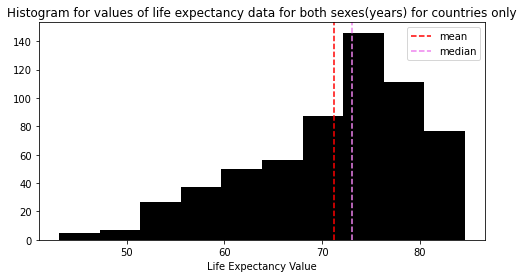

In [159]:
# histogram of data with mean & median
fig, ax = plt.subplots(figsize = (8,4))
histogram = ax.hist(life_exp_country_val, color='black')

ax.set(title  = 'Histogram for values of life expectancy data for both sexes(years) for countries only',
       xlabel = 'Life Expectancy Value')

mean = ax.axvline(np.mean(life_exp_country_val), ls='--', c='red', label='mean')   # mean 
median = ax.axvline(np.median(life_exp_country_val), ls='--', c='violet', label='median') # median

ax.legend();

#### Answer Q3: The mean and median of the distribution indicates that the average life expectancy for both sexes is around 71 years and the middle value of the distribution is around 73 years.

### 4. Compute and display the range, the interquartile range, and the standard deviation σ. Plot a histogram of the data with vertical lines the first quartile, the third quartile, and the mean +/− the standard deviation (i.e. 4 vertical lines in total)

In [160]:
#computed range, interquartile range, std. deviation
print(f' The range of the data is {np.ptp(life_exp_country_val)}') #range
      
print(f' The interquartile range of the data is {scipy.stats.iqr(life_exp_country_val)}') #iqr

print(f' The standard deviation of the data is {np.std(life_exp_country_val)}') # standard deviation

 The range of the data is 41.49999999999999
 The interquartile range of the data is 11.650000000000006
 The standard deviation of the data is 8.546790600519302


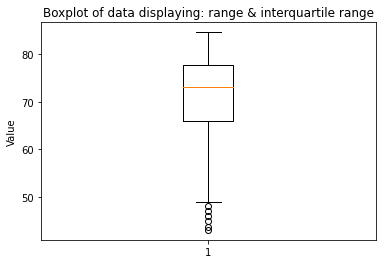

In [161]:
plt.boxplot(life_exp_country_val);
plt.title('Boxplot of data displaying: range & interquartile range')
plt.ylabel('Value');

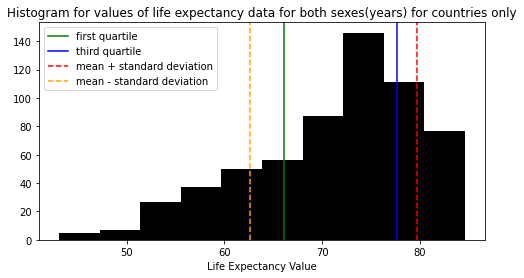

In [162]:
# histogram of data with first quartile, third quartile and the mean +/− the standard deviation (i.e. 4 vertical lines in total)
fig, ax = plt.subplots(figsize = (8,4))
histogram = ax.hist(life_exp_country_val, color='black')

ax.set(title  = 'Histogram for values of life expectancy data for both sexes(years) for countries only',
       xlabel = 'Life Expectancy Value')

first_quartile = ax.axvline(np.quantile(life_exp_country_val, 0.25), ls='-', c='green', label='first quartile')  # first quantile
third_quartile = ax.axvline(np.quantile(life_exp_country_val, 0.75), ls='-', c='blue', label='third quartile')  # third quantile
mean_plus_std  = ax.axvline(np.mean(life_exp_country_val) + np.std(life_exp_country_val), ls='--', c='red', label='mean + standard deviation')
mean_minus_std  = ax.axvline(np.mean(life_exp_country_val) - np.std(life_exp_country_val), ls='--', c='orange', label='mean - standard deviation')

ax.legend();

### 5. We covered several classes of distributions in the lecture (e.g. distributions on finite sets). Based on your observations so far, which class and which distribution within this class do you think would be suitable to model life expectancy? Briefly justify your choice. Generate N samples from this distribution. Adjust your parameters so that these samples are not too dissimilar to those from the life expectancy data. Plot a histogram for this data together with vertical lines for the mean, first, second and third quartile.

#### Answer 5: The normal distribution can be considered the most appropriate distribution to model life expectancy data. It is a continuous distribution with infinite support and the reason to choose it for the following scenario is that the mean, median and mode of the data are almost similar and the mean of the data divides the distribution into approximately two symmetrical parts.

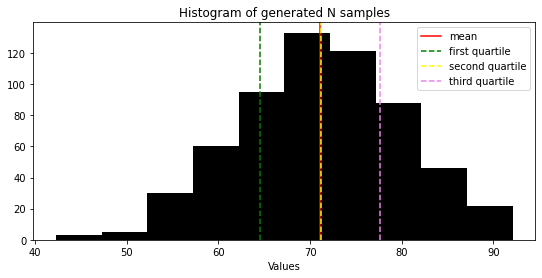

In [166]:
# Generated N samples from the normal distribution
np.random.seed(20)
samplex = norm.rvs(loc=71, scale=9, size=N)

# histogram of generated N samples with mean, first, second and third quartile
fig, ax = plt.subplots(figsize = (9,4))
histogram = ax.hist(samplex, color='black')

ax.set(title  = 'Histogram of generated N samples',
       xlabel = 'Values')

mean = ax.axvline(np.mean(samplex), ls='-', c='r', label='mean') # mean 
first_quartilex = ax.axvline(np.quantile(samplex, 0.25), ls='--', c='green', label='first quartile') # first quartile
second_quartile = ax.axvline(np.quantile(samplex, 0.5), ls='--', c='yellow', label ='second quartile') #second quartile
third_quartilex = ax.axvline(np.quantile(samplex, 0.75), ls='--', c='violet', label='third quartile') # third quartile

ax.legend();